In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [2]:
bsap = pd.read_csv('../DataOut/bus_stop_all_points.csv')
bst = pd.read_csv('../DataOut/bus_stop_times.csv')
btapwaaraad = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv')
btapwaara = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration.csv')
btapwa = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration.csv')
btap = pd.read_csv('../DataOut/bus_trip_all_points.csv')
bt = pd.read_csv('../DataOut/bus_trips.csv')
te = pd.read_csv('../DataOut/trip_ends.csv')

In [3]:
te

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,grouped_ends,entry/exit,trip_id
0,574670748,116,2021-10-16 07:08:31,7.299052,80.734410,7.01944,2021-10-16,07:08:31,POINT (195659.52317664068 232979.73272654996),BT02,2,0,1.0
1,574721062,116,2021-10-16 07:53:04,7.291710,80.635112,5.93953,2021-10-16,07:53:04,POINT (184695.3910443462 232169.99429151896),BT01,3,1,1.0
2,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,3,0,2.0
3,574787724,116,2021-10-16 08:53:48,7.299068,80.734350,4.85961,2021-10-16,08:53:48,POINT (195652.88748366528 232981.57999858505),BT02,4,1,2.0
4,574907780,116,2021-10-16 10:50:19,7.298947,80.734155,8.09935,2021-10-16,10:50:19,POINT (195631.36679008024 232968.12393211995),BT02,4,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31777,898420758,1719,2022-02-25 14:38:03,7.298883,80.733832,11.87910,2022-02-25,14:38:03,POINT (195595.65849678373 232961.1270650882),BT02,19394,1,15893.0
31778,898722926,1719,2022-02-25 16:00:04,7.298873,80.733850,14.57880,2022-02-25,16:00:04,POINT (195597.678970129 232960.0210734187),BT02,19394,0,15894.0
31779,898917340,1719,2022-02-25 16:48:05,7.291622,80.635255,3.23974,2022-02-25,16:48:05,POINT (184711.22167117143 232160.21401474395),BT01,19395,1,15894.0
31780,899049276,1719,2022-02-25 17:20:21,7.293082,80.635617,8.63931,2022-02-25,17:20:21,POINT (184751.19659611565 232321.65233816946),BT01,19395,0,15895.0


In [4]:
bt

,trip_id,deviceid,date,start_terminal,end_terminal,direction,start_time,end_time,duration,duration_in_mins,day_of_week,hour_of_day
0,1.0,116,2021-10-16,BT02,BT01,2,07:08:31,07:53:04,0:44:33,44.550000,5,7
1,2.0,116,2021-10-16,BT01,BT02,1,08:03:04,08:53:48,0:50:44,50.733333,5,8
2,3.0,116,2021-10-16,BT02,BT01,2,10:50:19,11:44:43,0:54:24,54.400000,5,10
3,4.0,116,2021-10-16,BT01,BT02,1,12:20:45,13:18:33,0:57:48,57.800000,5,12
4,5.0,116,2021-10-16,BT02,BT01,2,14:14:36,15:07:05,0:52:29,52.483333,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...
15886,15891.0,1719,2022-02-25,BT01,BT02,1,09:42:39,10:34:59,0:52:20,52.333333,4,9
15887,15892.0,1719,2022-02-25,BT02,BT01,2,12:20:33,13:15:43,0:55:10,55.166667,4,12
15888,15893.0,1719,2022-02-25,BT01,BT02,1,13:41:19,14:38:03,0:56:44,56.733333,4,13
15889,15894.0,1719,2022-02-25,BT02,BT01,2,16:00:04,16:48:05,0:48:01,48.016667,4,16


In [5]:
btap

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1299052,897183269,1719,2022-02-25 09:20:30,7.291665,80.635343,6.47948,2022-02-25,09:20:30,POINT (184720.9728106963 232165.01034694258),BT01,15890.0,2
1299053,897881718,1719,2022-02-25 12:20:33,7.298970,80.733818,13.49890,2022-02-25,12:20:33,POINT (195594.19080339494 232970.71466525554),BT02,15892.0,2
1299054,898099616,1719,2022-02-25 13:15:43,7.291682,80.635215,8.09935,2022-02-25,13:15:43,POINT (184706.8070567022 232166.85029675177),BT01,15892.0,2
1299055,898722926,1719,2022-02-25 16:00:04,7.298873,80.733850,14.57880,2022-02-25,16:00:04,POINT (195597.678970129 232960.0210734187),BT02,15894.0,2


In [6]:
btapwa

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165044,887885901,1410,2022-02-22 15:04:26,7.291790,80.635067,4.31966,2022-02-22,15:04:26,POINT (184690.425021542 232178.8313328406),BT01,15555.0,2,-0.001841
1165045,893951863,1410,2022-02-24 10:32:21,7.291703,80.635357,4.31966,2022-02-24,10:32:21,POINT (184722.44261610083 232169.2452110884),BT01,15558.0,2,0.001391
1165046,895005999,1410,2022-02-24 14:51:43,7.291685,80.635282,3.23974,2022-02-24,14:51:43,POINT (184714.16084255013 232167.22405422156),BT01,15560.0,2,-0.000587
1165047,895866047,1410,2022-02-24 18:46:53,7.291740,80.635173,10.25920,2022-02-24,18:46:53,POINT (184702.20468358186 232173.30970404382),BT01,15562.0,2,0.002220


In [7]:
btapwaara

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,1.278067
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.722300
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.048332
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,1.052222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165044,887885901,1410,2022-02-22 15:04:26,7.291790,80.635067,4.31966,2022-02-22,15:04:26,POINT (184690.425021542 232178.8313328406),BT01,15555.0,2,-0.001841,0.000000
1165045,893951863,1410,2022-02-24 10:32:21,7.291703,80.635357,4.31966,2022-02-24,10:32:21,POINT (184722.44261610083 232169.2452110884),BT01,15558.0,2,0.001391,0.000000
1165046,895005999,1410,2022-02-24 14:51:43,7.291685,80.635282,3.23974,2022-02-24,14:51:43,POINT (184714.16084255013 232167.22405422156),BT01,15560.0,2,-0.000587,0.000000
1165047,895866047,1410,2022-02-24 18:46:53,7.291740,80.635173,10.25920,2022-02-24,18:46:53,POINT (184702.20468358186 232173.30970404382),BT01,15562.0,2,0.002220,0.000000


In [8]:
btapwaaraad

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.000000,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,1.278067,123.738485
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.722300,163.044397
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.048332,211.472339
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,1.052222,287.492821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165044,887885901,1410,2022-02-22 15:04:26,7.291790,80.635067,4.31966,2022-02-22,15:04:26,POINT (184690.425021542 232178.8313328406),BT01,15555.0,2,-0.001841,0.000000,0.000000
1165045,893951863,1410,2022-02-24 10:32:21,7.291703,80.635357,4.31966,2022-02-24,10:32:21,POINT (184722.44261610083 232169.2452110884),BT01,15558.0,2,0.001391,0.000000,0.000000
1165046,895005999,1410,2022-02-24 14:51:43,7.291685,80.635282,3.23974,2022-02-24,14:51:43,POINT (184714.16084255013 232167.22405422156),BT01,15560.0,2,-0.000587,0.000000,0.000000
1165047,895866047,1410,2022-02-24 18:46:53,7.291740,80.635173,10.25920,2022-02-24,18:46:53,POINT (184702.20468358186 232173.30970404382),BT01,15562.0,2,0.002220,0.000000,0.000000


In [9]:
bst

,trip_id,deviceid,date,direction,bus_stop,arrival_time,departure_time,dwell_time,dwell_time_in_seconds,day_of_week,hour_of_day,weekday/end
0,2.0,116,2021-10-16,1,101,08:04:49,08:05:34,0:00:45,45.0,5,8,0
1,2.0,116,2021-10-16,1,102,08:09:04,08:09:04,0:00:00,0.0,5,8,0
2,2.0,116,2021-10-16,1,103,08:16:15,08:16:15,0:00:00,0.0,5,8,0
3,2.0,116,2021-10-16,1,104,08:20:36,08:20:36,0:00:00,0.0,5,8,0
4,2.0,116,2021-10-16,1,105,08:22:21,08:22:21,0:00:00,0.0,5,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71599,5586.0,262,2022-08-09,2,207,10:31:48,10:31:48,0:00:00,0.0,1,10,1
71600,5586.0,262,2022-08-09,2,209,10:38:11,10:38:11,0:00:00,0.0,1,10,1
71601,5586.0,262,2022-08-09,2,210,10:47:35,10:47:50,0:00:15,15.0,1,10,1
71602,5586.0,262,2022-08-09,2,211,10:48:46,10:48:46,0:00:00,0.0,1,10,1


In [10]:
bsap

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1
1,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1
2,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1
3,574736664,116,2021-10-16 08:04:49,7.290943,80.638160,0.00000,2021-10-16,08:04:49,POINT (185031.9565310351 232085.11003064158),101,2.0,1
4,574736665,116,2021-10-16 08:05:04,7.290943,80.638157,0.00000,2021-10-16,08:05:04,POINT (185031.58111776915 232085.11014168937),101,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
332267,897183269,1719,2022-02-25 09:20:30,7.291665,80.635343,6.47948,2022-02-25,09:20:30,POINT (184720.9728106963 232165.01034694258),BT01,15890.0,2
332268,897881718,1719,2022-02-25 12:20:33,7.298970,80.733818,13.49890,2022-02-25,12:20:33,POINT (195594.19080339494 232970.71466525554),BT02,15892.0,2
332269,898099616,1719,2022-02-25 13:15:43,7.291682,80.635215,8.09935,2022-02-25,13:15:43,POINT (184706.8070567022 232166.85029675177),BT01,15892.0,2
332270,898722926,1719,2022-02-25 16:00:04,7.298873,80.733850,14.57880,2022-02-25,16:00:04,POINT (195597.678970129 232960.0210734187),BT02,15894.0,2


**Use btap to find time periods**

In [11]:
df = btap

In [12]:
# Convert 'date' column to datetime
df['devicetime'] = pd.to_datetime(df['devicetime'])

# Define 'weekday/end' column
df['weekday_end'] = df['devicetime'].dt.dayofweek // 5

df

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,weekday_end
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1,1
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,1
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,1
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,1
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299052,897183269,1719,2022-02-25 09:20:30,7.291665,80.635343,6.47948,2022-02-25,09:20:30,POINT (184720.9728106963 232165.01034694258),BT01,15890.0,2,0
1299053,897881718,1719,2022-02-25 12:20:33,7.298970,80.733818,13.49890,2022-02-25,12:20:33,POINT (195594.19080339494 232970.71466525554),BT02,15892.0,2,0
1299054,898099616,1719,2022-02-25 13:15:43,7.291682,80.635215,8.09935,2022-02-25,13:15:43,POINT (184706.8070567022 232166.85029675177),BT01,15892.0,2,0
1299055,898722926,1719,2022-02-25 16:00:04,7.298873,80.733850,14.57880,2022-02-25,16:00:04,POINT (195597.678970129 232960.0210734187),BT02,15894.0,2,0


In [13]:
df = df[['id', 'speed', 'direction', 'devicetime', 'weekday_end', 'time']]
df

,id,speed,direction,devicetime,weekday_end,time
0,574733098,9.17927,1,2021-10-16 08:03:04,1,08:03:04
1,574733099,14.03890,1,2021-10-16 08:03:19,1,08:03:19
2,574733100,10.25920,1,2021-10-16 08:03:34,1,08:03:34
3,574733101,7.55940,1,2021-10-16 08:03:49,1,08:03:49
4,574733102,3.77970,1,2021-10-16 08:04:04,1,08:04:04
...,...,...,...,...,...,...
1299052,897183269,6.47948,2,2022-02-25 09:20:30,0,09:20:30
1299053,897881718,13.49890,2,2022-02-25 12:20:33,0,12:20:33
1299054,898099616,8.09935,2,2022-02-25 13:15:43,0,13:15:43
1299055,898722926,14.57880,2,2022-02-25 16:00:04,0,16:00:04


In [14]:
#remove zero speed values
df = df[df['speed'] != 0]
df

,id,speed,direction,devicetime,weekday_end,time
0,574733098,9.17927,1,2021-10-16 08:03:04,1,08:03:04
1,574733099,14.03890,1,2021-10-16 08:03:19,1,08:03:19
2,574733100,10.25920,1,2021-10-16 08:03:34,1,08:03:34
3,574733101,7.55940,1,2021-10-16 08:03:49,1,08:03:49
4,574733102,3.77970,1,2021-10-16 08:04:04,1,08:04:04
...,...,...,...,...,...,...
1299052,897183269,6.47948,2,2022-02-25 09:20:30,0,09:20:30
1299053,897881718,13.49890,2,2022-02-25 12:20:33,0,12:20:33
1299054,898099616,8.09935,2,2022-02-25 13:15:43,0,13:15:43
1299055,898722926,14.57880,2,2022-02-25 16:00:04,0,16:00:04


separate accirding to directiona dn weekday/end

In [15]:
df1 = df[df['direction']==1]
df2 = df[df['direction']==2]

In [16]:
df1_day = df1[df1['weekday_end']==1]
df2_day = df2[df2['weekday_end']==1]
df1_end = df1[df1['weekday_end']==0]
df2_end = df2[df2['weekday_end']==0]

In [17]:
df1_day

,id,speed,direction,devicetime,weekday_end,time
0,574733098,9.17927,1,2021-10-16 08:03:04,1,08:03:04
1,574733099,14.03890,1,2021-10-16 08:03:19,1,08:03:19
2,574733100,10.25920,1,2021-10-16 08:03:34,1,08:03:34
3,574733101,7.55940,1,2021-10-16 08:03:49,1,08:03:49
4,574733102,3.77970,1,2021-10-16 08:04:04,1,08:04:04
...,...,...,...,...,...,...
652456,782001732,19.97840,1,2022-01-22 08:46:25,1,08:46:25
652457,783025495,11.33910,1,2022-01-22 12:12:08,1,12:12:08
652458,783282366,5.39957,1,2022-01-22 13:04:55,1,13:04:55
652459,784155731,5.93953,1,2022-01-22 16:00:59,1,16:00:59


use df1_day (without zero speed values)

In [18]:
# Convert time column to datetime
df1_day['time'] = pd.to_datetime(df1_day['time'])


C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3591491983.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1_day['time'] = pd.to_datetime(df1_day['time'])
C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3591491983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_day['time'] = pd.to_datetime(df1_day['time'])


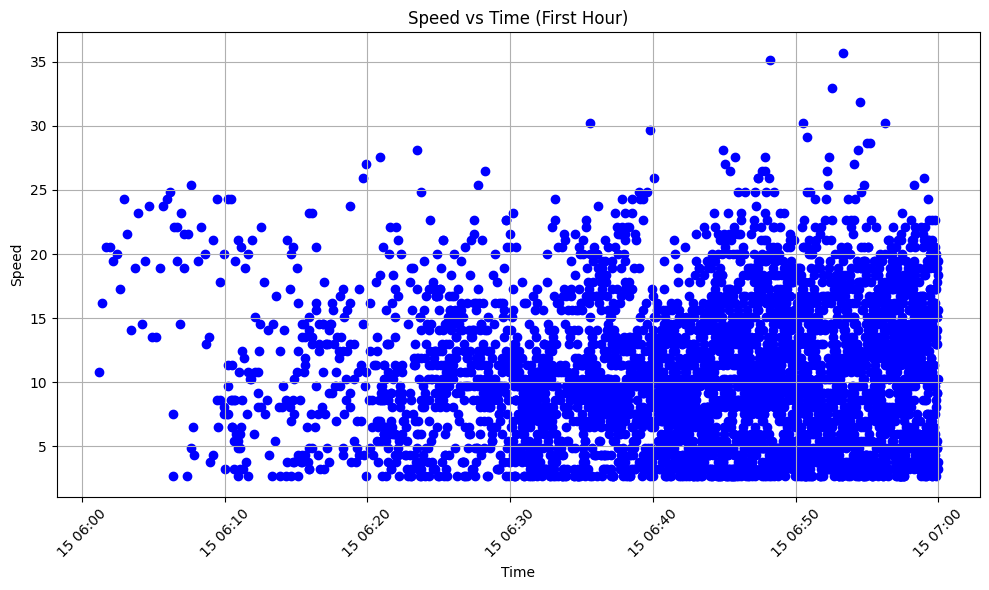

In [19]:
# Filter data for only the first hour
first_hour_data = df1_day[(df1_day['time'].dt.hour == 6)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(first_hour_data['time'], first_hour_data['speed'], color='b', marker='o')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed vs Time (First Hour)')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3209929897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_day['time_numeric'] = df1_day['time'].dt.hour * 60 + df1_day['time'].dt.minute
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will ch

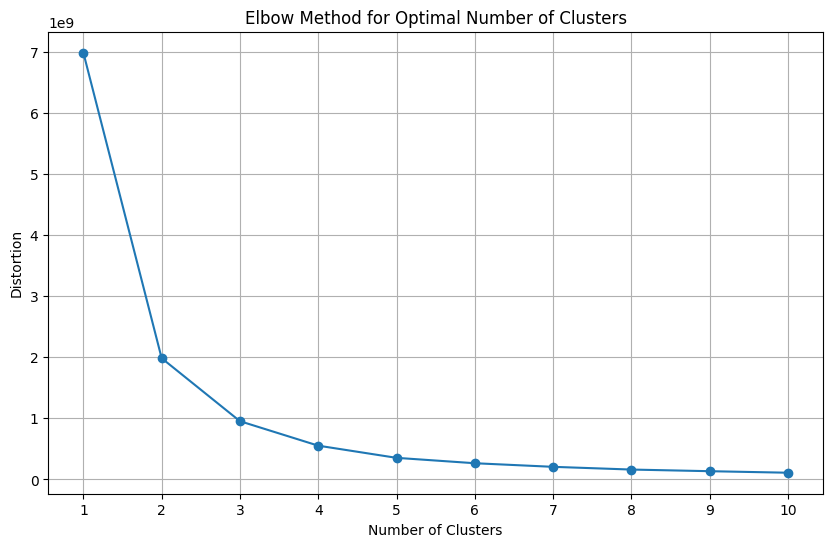

In [20]:
# Convert time to numerical format (minutes since midnight)
df1_day['time_numeric'] = df1_day['time'].dt.hour * 60 + df1_day['time'].dt.minute

# Select relevant features for clustering
X = df1_day[['time_numeric', 'speed']]

# Calculate the distortion for a range of number of clusters
distortions = []
for i in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3618636313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_day['time_numeric'] = df1_day['time'].dt.hour * 60 + df1_day['time'].dt.minute
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3618636313.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

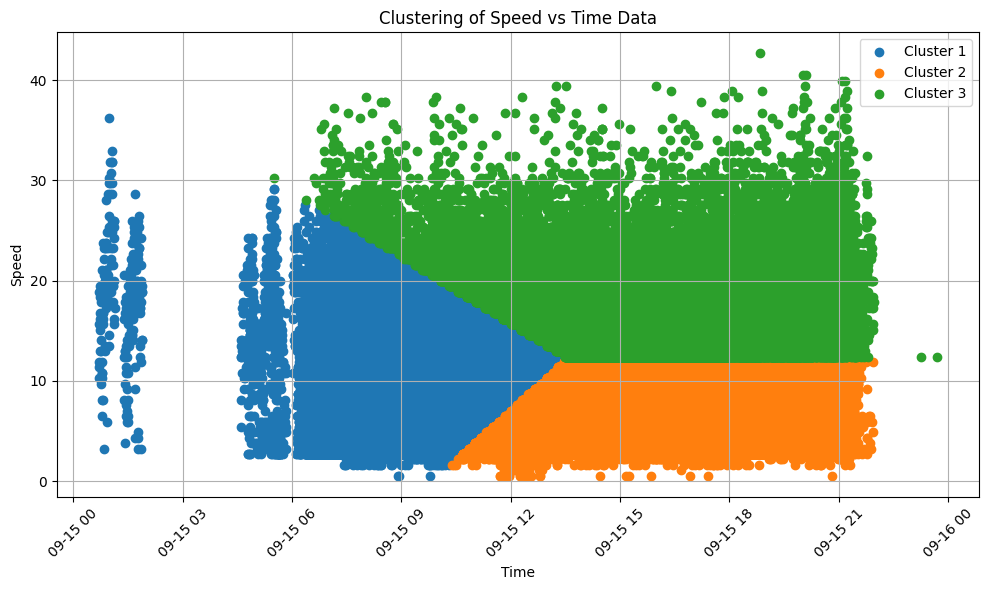

In [21]:
# Convert time to numerical format (minutes since midnight)
df1_day['time_numeric'] = df1_day['time'].dt.hour * 60 + df1_day['time'].dt.minute

# Select relevant features for clustering
X = df1_day[['time_numeric', 'speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df1_day['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = df1_day[df1_day['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Clustering of Speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


df1_day_results

In [22]:
# Convert time column to datetime
df1_day['time'] = pd.to_datetime(df1_day['time'])

# Define the time range for 10-minute intervals
start_time = pd.Timestamp('01:00:00').time()
end_time = pd.Timestamp('23:59:59').time()
time_intervals = pd.date_range(start=pd.Timestamp.combine(pd.Timestamp.today(), start_time),
                               end=pd.Timestamp.combine(pd.Timestamp.today(), end_time),
                               freq='10T')

# Create a new DataFrame to store the results
results = pd.DataFrame(columns=['id', 'avg_speed', 'time', 'time_component', 'weekday_end'])

# Iterate through the time intervals and calculate average speed
for interval_start, interval_end in zip(time_intervals, time_intervals[1:]):
    interval_data = df1_day[(df1_day['time'].dt.time >= interval_start.time()) & (df1_day['time'].dt.time < interval_end.time())]
    
    if not interval_data.empty:
        avg_speed = interval_data['speed'].mean()
        weekday_end = interval_data['weekday_end'].iloc[0]  # Assumes same value for the interval
        time_component = interval_data['time'].dt.time.iloc[0]  # Extract time component
        
        results.loc[len(results)] = [interval_data['id'].iloc[0], avg_speed, interval_start, time_component, weekday_end]

# Print the results DataFrame
print(results)


C:\Users\gw\AppData\Local\Temp\ipykernel_34120\4247316661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_day['time'] = pd.to_datetime(df1_day['time'])


             id  avg_speed                time time_component  weekday_end
0    1435557492  24.213700 2023-09-15 01:00:00       01:00:10            1
1    1456614238  11.956191 2023-09-15 01:20:00       01:23:12            1
2    1456617052  18.520528 2023-09-15 01:30:00       01:30:12            1
3    1456620660  18.787737 2023-09-15 01:40:00       01:40:12            1
4    1456623921  16.780218 2023-09-15 01:50:00       01:50:11            1
..          ...        ...                 ...            ...          ...
107   607490997  15.517338 2023-09-15 21:30:00       21:30:04            1
108   581279959  17.749648 2023-09-15 21:40:00       21:45:47            1
109   879553539  17.728592 2023-09-15 21:50:00       21:50:03            1
110   903358339  12.419000 2023-09-15 23:10:00       23:15:20            1
111   903379195  12.419000 2023-09-15 23:40:00       23:41:50            1

[112 rows x 5 columns]


In [23]:
results = pd.DataFrame(results)
results

,id,avg_speed,time,time_component,weekday_end
0,1435557492,24.213700,2023-09-15 01:00:00,01:00:10,1
1,1456614238,11.956191,2023-09-15 01:20:00,01:23:12,1
2,1456617052,18.520528,2023-09-15 01:30:00,01:30:12,1
3,1456620660,18.787737,2023-09-15 01:40:00,01:40:12,1
4,1456623921,16.780218,2023-09-15 01:50:00,01:50:11,1
...,...,...,...,...,...
107,607490997,15.517338,2023-09-15 21:30:00,21:30:04,1
108,581279959,17.749648,2023-09-15 21:40:00,21:45:47,1
109,879553539,17.728592,2023-09-15 21:50:00,21:50:03,1
110,903358339,12.419000,2023-09-15 23:10:00,23:15:20,1


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


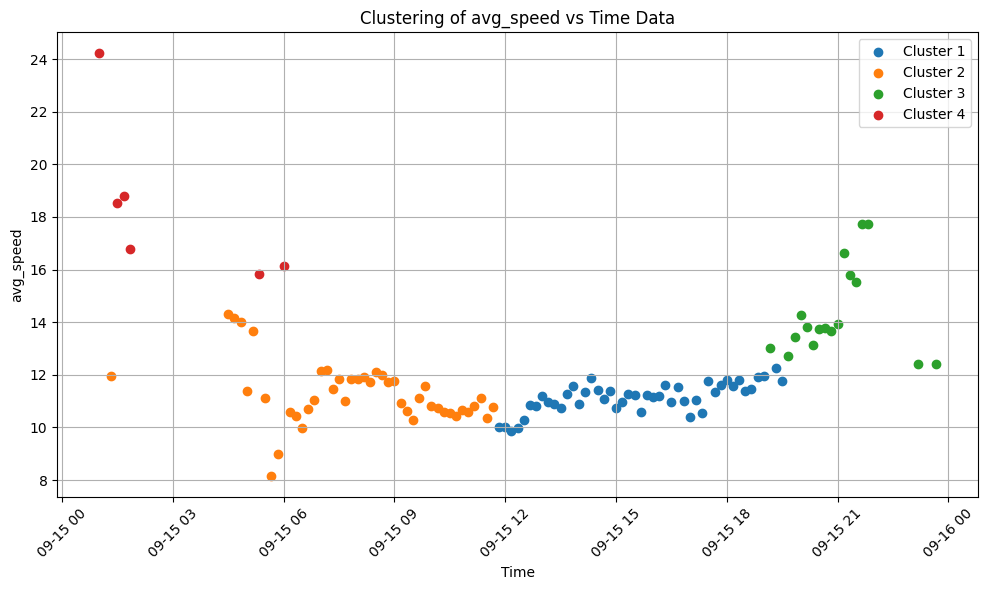

In [24]:
# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results[results['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


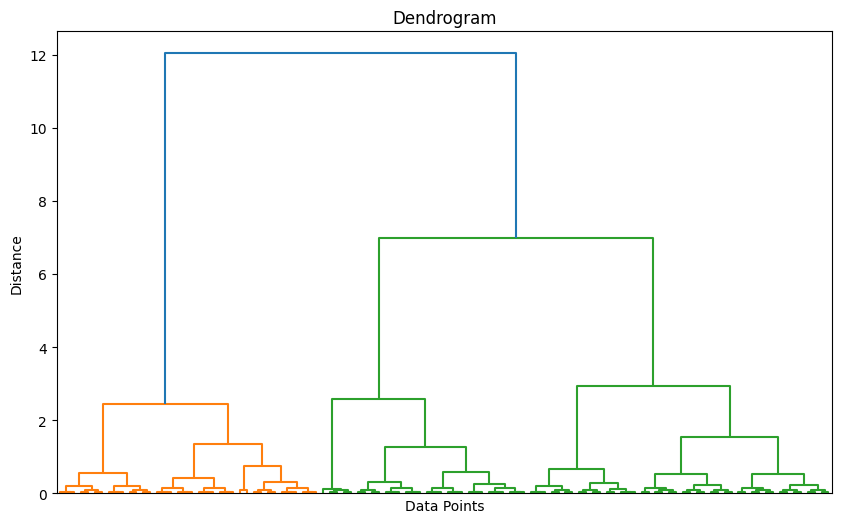

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.xticks([])
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


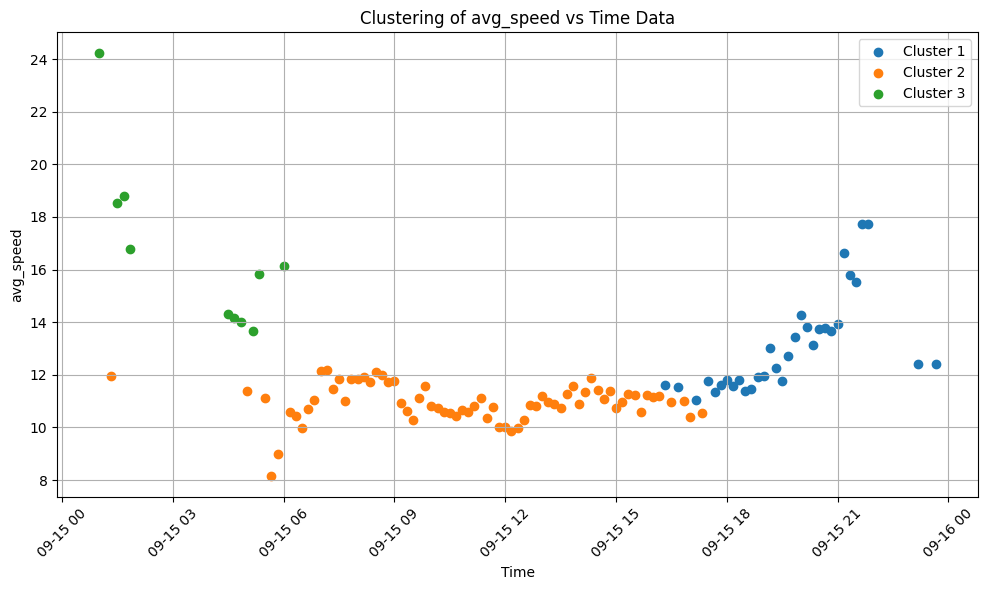

In [26]:
# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results[results['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


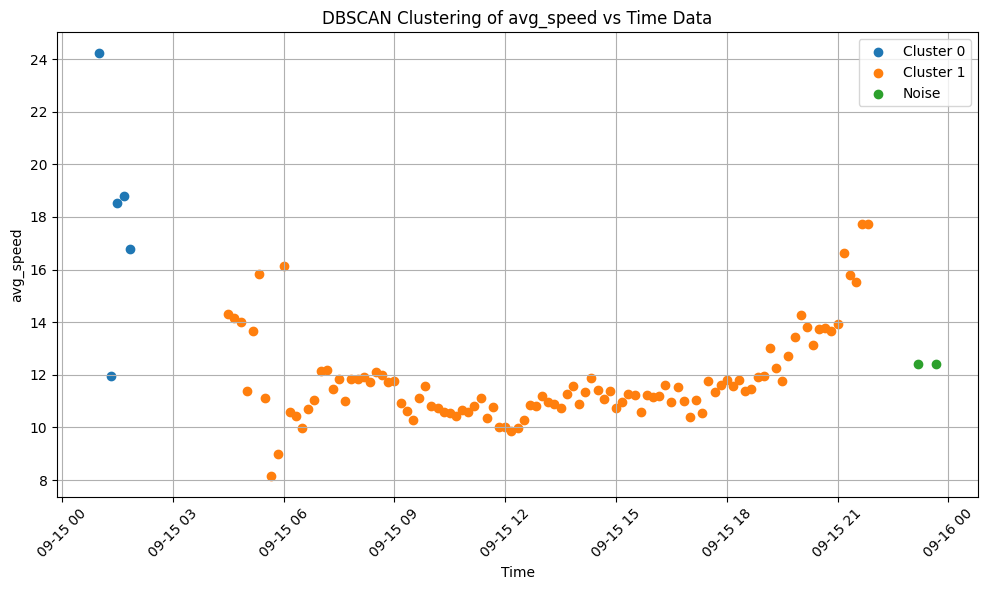

In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric', 'avg_speed']]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=4)
results['cluster'] = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results['cluster'].unique()
for cluster_id in unique_clusters:
    if cluster_id == -1:
        cluster_data = results[results['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label='Noise')
    else:
        cluster_data = results[results['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('DBSCAN Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


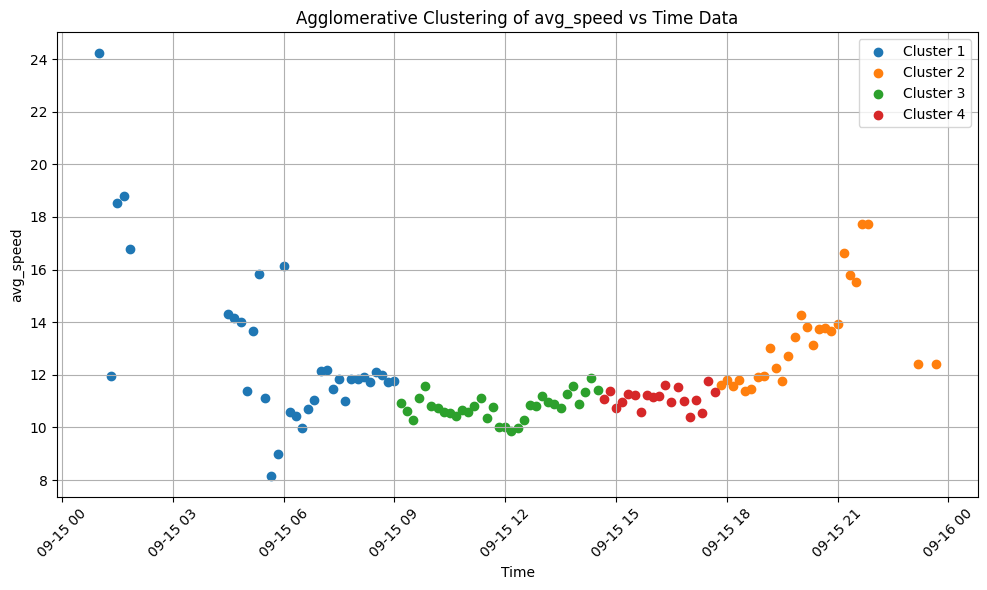

In [28]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric', 'avg_speed']]

# Perform Agglomerative clustering
num_clusters = 4  # Adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
results['cluster'] = agg_clustering.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results[results['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Agglomerative Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


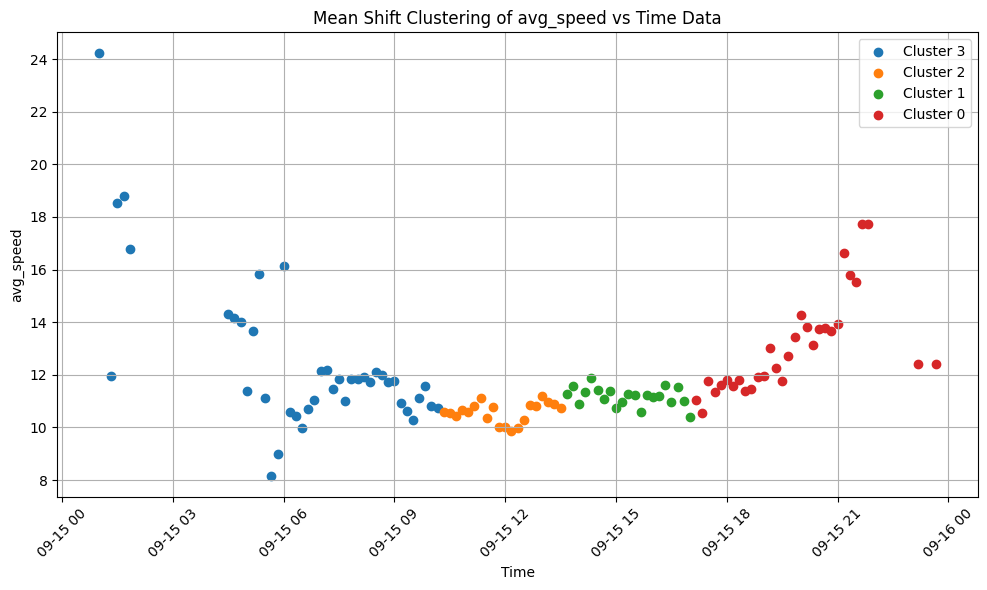

In [29]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with the data
# Drop rows with missing values in 'time' and 'avg_speed' columns
results.dropna(subset=['time', 'avg_speed'], inplace=True)

# Convert time to numerical format (minutes since midnight)
results['time_numeric'] = results['time'].dt.hour * 60 + results['time'].dt.minute

# Select relevant features for clustering
X = results[['time_numeric', 'avg_speed']]

# Perform Mean Shift clustering
meanshift = MeanShift()
results['cluster'] = meanshift.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results['cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = results[results['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Mean Shift Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


use df1_end (without zero speed values)

In [30]:
# Convert time column to datetime
df1_end['time'] = pd.to_datetime(df1_end['time'])

# Define the time range for 10-minute intervals
start_time = pd.Timestamp('01:00:00').time()
end_time = pd.Timestamp('23:59:59').time()
time_intervals = pd.date_range(start=pd.Timestamp.combine(pd.Timestamp.today(), start_time),
                               end=pd.Timestamp.combine(pd.Timestamp.today(), end_time),
                               freq='10T')

# Create a new DataFrame to store the results
results1 = pd.DataFrame(columns=['id', 'avg_speed', 'time', 'time_component', 'weekday_end'])

# Iterate through the time intervals and calculate average speed
for interval_start, interval_end in zip(time_intervals, time_intervals[1:]):
    interval_data = df1_end[(df1_end['time'].dt.time >= interval_start.time()) & (df1_end['time'].dt.time < interval_end.time())]
    
    if not interval_data.empty:
        avg_speed = interval_data['speed'].mean()
        weekday_end = interval_data['weekday_end'].iloc[0]  # Assumes same value for the interval
        time_component = interval_data['time'].dt.time.iloc[0]  # Extract time component
        
        results1.loc[len(results1)] = [interval_data['id'].iloc[0], avg_speed, interval_start, time_component, weekday_end]

# Print the results DataFrame
print(results1)


C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3906515938.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1_end['time'] = pd.to_datetime(df1_end['time'])
C:\Users\gw\AppData\Local\Temp\ipykernel_34120\3906515938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_end['time'] = pd.to_datetime(df1_end['time'])


             id  avg_speed                time time_component  weekday_end
0    1397933971  20.518360 2023-09-15 01:30:00       01:38:47            0
1    1397934327  17.710593 2023-09-15 01:40:00       01:40:02            0
2    1397938188  22.528212 2023-09-15 01:50:00       01:50:03            0
3    1397940049  22.399509 2023-09-15 02:00:00       02:00:45            0
4    1380077917  17.252915 2023-09-15 04:30:00       04:38:37            0
..          ...        ...                 ...            ...          ...
112   593546830  15.432721 2023-09-15 22:30:00       22:30:05            0
113   854834915  11.663072 2023-09-15 23:10:00       23:12:07            0
114   584279479  14.893003 2023-09-15 23:20:00       23:26:00            0
115   584279641  21.403902 2023-09-15 23:30:00       23:30:02            0
116   854844557  20.867753 2023-09-15 23:40:00       23:40:05            0

[117 rows x 5 columns]


In [31]:
results1 = pd.DataFrame(results1)
results1

,id,avg_speed,time,time_component,weekday_end
0,1397933971,20.518360,2023-09-15 01:30:00,01:38:47,0
1,1397934327,17.710593,2023-09-15 01:40:00,01:40:02,0
2,1397938188,22.528212,2023-09-15 01:50:00,01:50:03,0
3,1397940049,22.399509,2023-09-15 02:00:00,02:00:45,0
4,1380077917,17.252915,2023-09-15 04:30:00,04:38:37,0
...,...,...,...,...,...
112,593546830,15.432721,2023-09-15 22:30:00,22:30:05,0
113,854834915,11.663072,2023-09-15 23:10:00,23:12:07,0
114,584279479,14.893003,2023-09-15 23:20:00,23:26:00,0
115,584279641,21.403902,2023-09-15 23:30:00,23:30:02,0


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


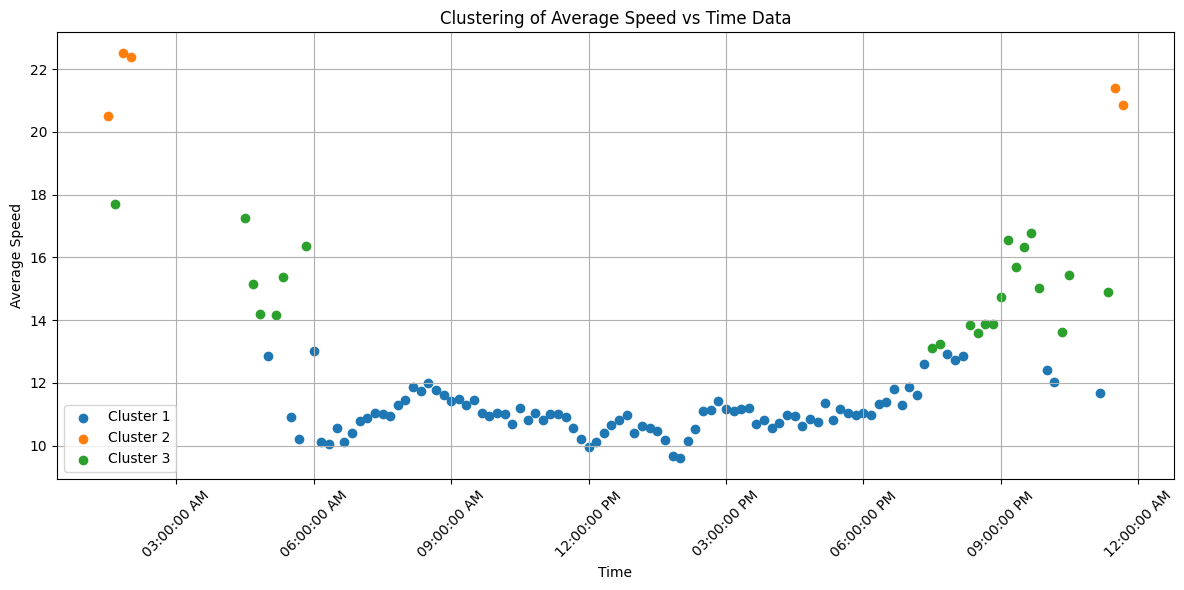

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Format time in HH:MM:SS in 12-hour format
results1['formatted_time'] = results1['time'].dt.strftime('%I:%M:%S %p')

# Select relevant features for clustering
X = results1[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['avg_speed']])

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results1['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 6))
for cluster_id in range(num_clusters):
    cluster_data = results1[results1['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')

# Set custom date format for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I:%M:%S %p'))

plt.xlabel('Time')
plt.ylabel('Average Speed')
plt.title('Clustering of Average Speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


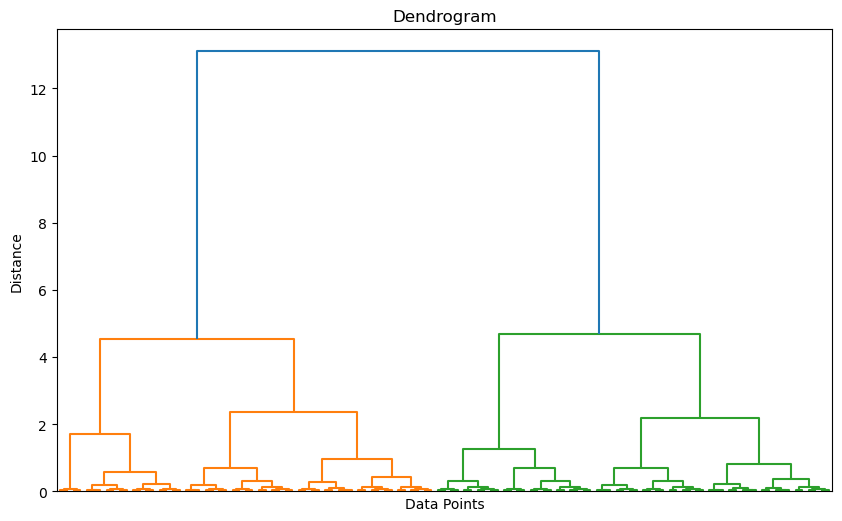

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Select relevant features for clustering
X = results1[['time_numeric']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.xticks([])
plt.show()

/home/sheshan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


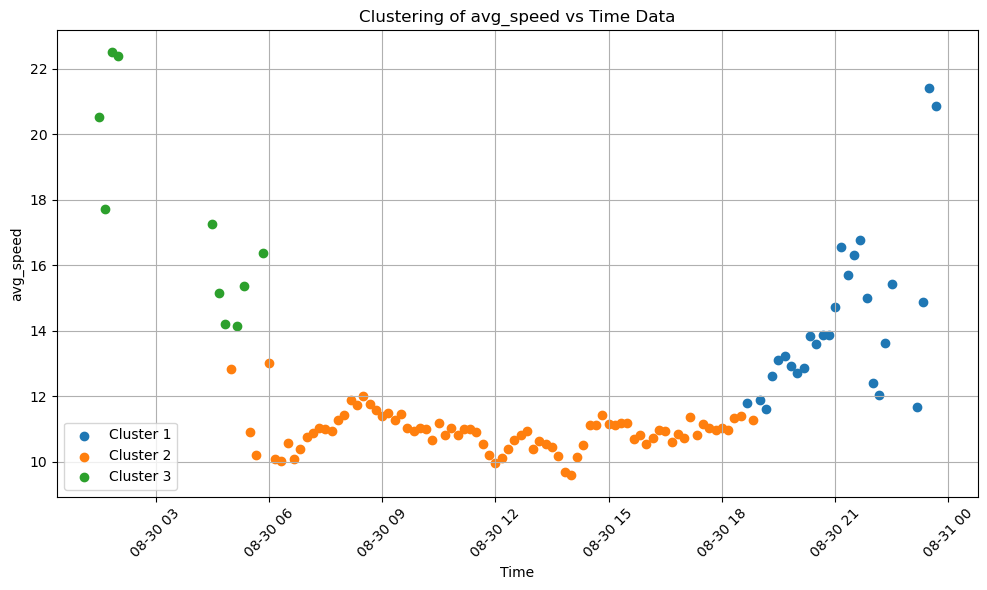

In [19]:
# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Select relevant features for clustering
X = results1[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results1['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results1[results1['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

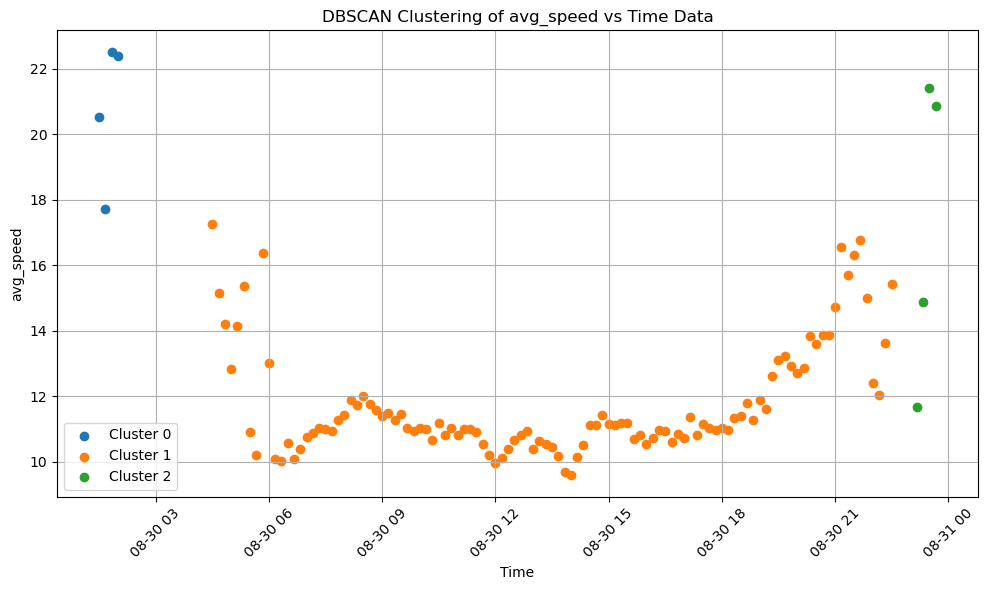

In [20]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Select relevant features for clustering
X = results1[['time_numeric', 'avg_speed']]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=4)
results1['cluster'] = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results1['cluster'].unique()
for cluster_id in unique_clusters:
    if cluster_id == -1:
        cluster_data = results1[results1['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label='Noise')
    else:
        cluster_data = results1[results1['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('DBSCAN Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


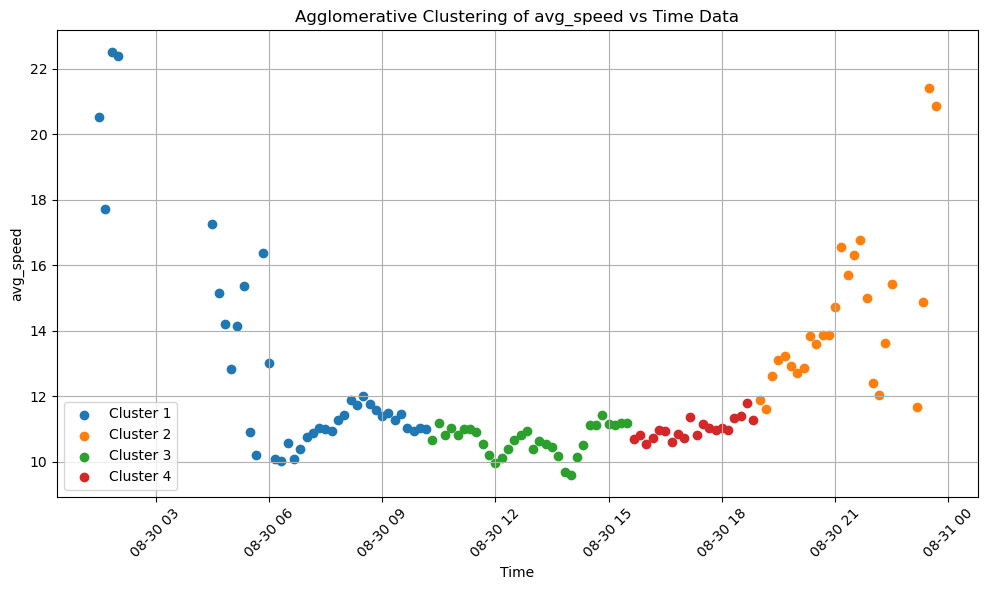

In [21]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Select relevant features for clustering
X = results1[['time_numeric', 'avg_speed']]

# Perform Agglomerative clustering
num_clusters = 4  # Adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
results1['cluster'] = agg_clustering.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results1[results1['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Agglomerative Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


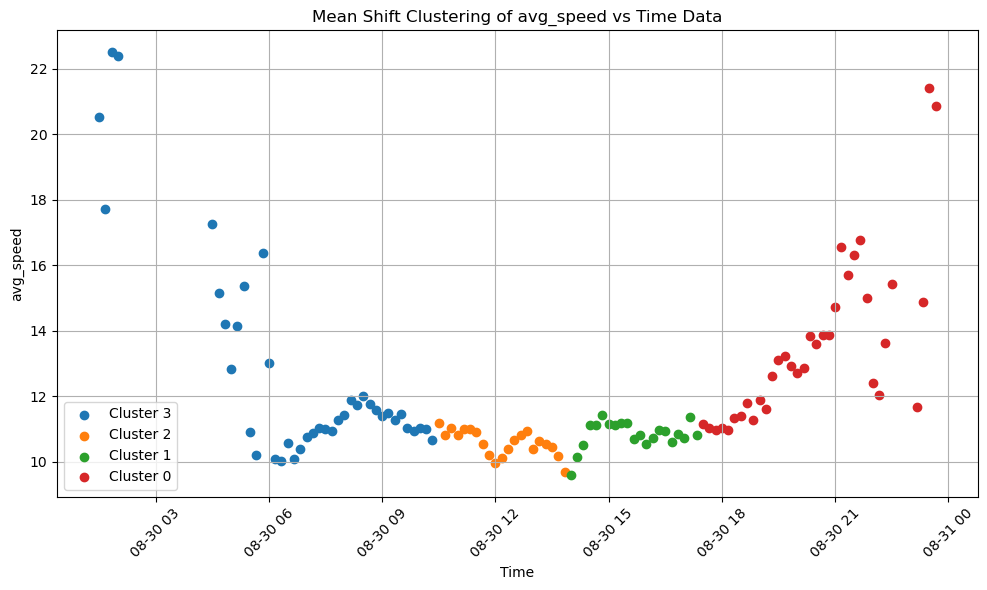

In [22]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with the data
# Drop rows with missing values in 'time' and 'avg_speed' columns
results1.dropna(subset=['time', 'avg_speed'], inplace=True)

# Convert time to numerical format (minutes since midnight)
results1['time_numeric'] = results1['time'].dt.hour * 60 + results1['time'].dt.minute

# Select relevant features for clustering
X = results1[['time_numeric', 'avg_speed']]

# Perform Mean Shift clustering
meanshift = MeanShift()
results1['cluster'] = meanshift.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results1['cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = results1[results1['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Mean Shift Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


use df2_day

In [11]:
# Convert time column to datetime
df2_day['time'] = pd.to_datetime(df2_day['time'])

# Define the time range for 10-minute intervals
start_time = pd.Timestamp('01:00:00').time()
end_time = pd.Timestamp('23:59:59').time()
time_intervals = pd.date_range(start=pd.Timestamp.combine(pd.Timestamp.today(), start_time),
                               end=pd.Timestamp.combine(pd.Timestamp.today(), end_time),
                               freq='10T')

# Create a new DataFrame to store the results
results2 = pd.DataFrame(columns=['id', 'avg_speed', 'time', 'time_component', 'weekday_end'])

# Iterate through the time intervals and calculate average speed
for interval_start, interval_end in zip(time_intervals, time_intervals[1:]):
    interval_data = df2_day[(df2_day['time'].dt.time >= interval_start.time()) & (df2_day['time'].dt.time < interval_end.time())]
    
    if not interval_data.empty:
        avg_speed = interval_data['speed'].mean()
        weekday_end = interval_data['weekday_end'].iloc[0]  # Assumes same value for the interval
        time_component = interval_data['time'].dt.time.iloc[0]  # Extract time component
        
        results2.loc[len(results2)] = [interval_data['id'].iloc[0], avg_speed, interval_start, time_component, weekday_end]

# Print the results DataFrame
print(results2)


/tmp/ipykernel_407993/1139398541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_day['time'] = pd.to_datetime(df2_day['time'])


             id  avg_speed                time time_component  weekday_end
0     809287728  19.573445 2023-08-30 03:10:00       03:12:27            1
1     809291972  20.222676 2023-08-30 03:20:00       03:20:07            1
2     809296155  16.001169 2023-08-30 03:30:00       03:30:03            1
3    1453685757  16.738700 2023-08-30 04:00:00       04:02:56            1
4     595987708  15.563466 2023-08-30 04:10:00       04:11:58            1
..          ...        ...                 ...            ...          ...
98    607458199  10.495406 2023-08-30 19:50:00       19:50:03            1
99    815745300  22.630549 2023-08-30 21:20:00       21:21:51            1
100   815752398  20.320826 2023-08-30 21:30:00       21:30:05            1
101   815759321  13.403637 2023-08-30 21:40:00       21:40:07            1
102   903357169  19.438450 2023-08-30 23:10:00       23:15:05            1

[103 rows x 5 columns]


In [12]:
results2 = pd.DataFrame(results2)
results2

,id,avg_speed,time,time_component,weekday_end
0,809287728,19.573445,2023-08-30 03:10:00,03:12:27,1
1,809291972,20.222676,2023-08-30 03:20:00,03:20:07,1
2,809296155,16.001169,2023-08-30 03:30:00,03:30:03,1
3,1453685757,16.738700,2023-08-30 04:00:00,04:02:56,1
4,595987708,15.563466,2023-08-30 04:10:00,04:11:58,1
...,...,...,...,...,...
98,607458199,10.495406,2023-08-30 19:50:00,19:50:03,1
99,815745300,22.630549,2023-08-30 21:20:00,21:21:51,1
100,815752398,20.320826,2023-08-30 21:30:00,21:30:05,1
101,815759321,13.403637,2023-08-30 21:40:00,21:40:07,1


/home/sheshan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


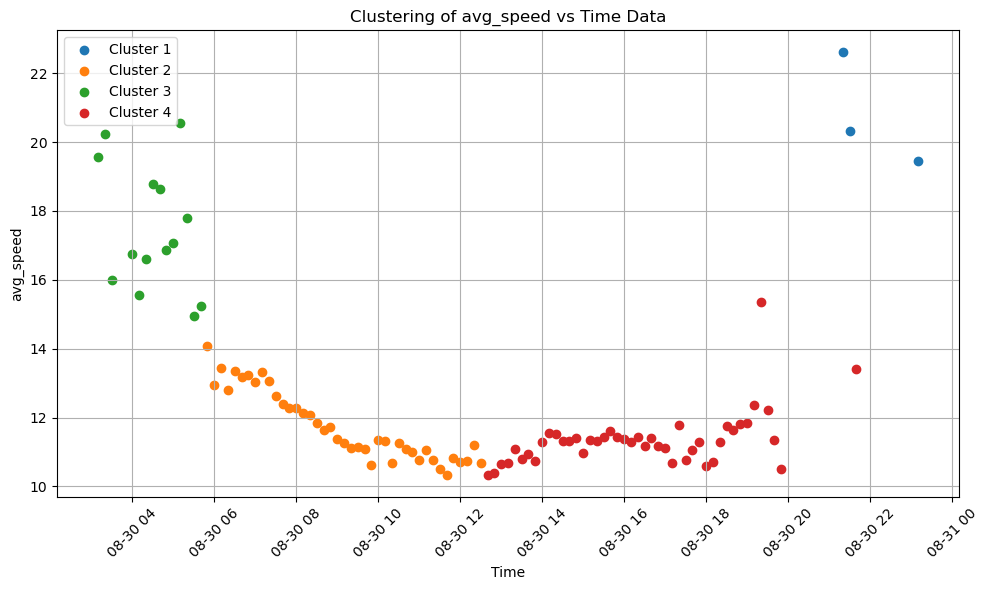

In [13]:
# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results2['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results2[results2['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


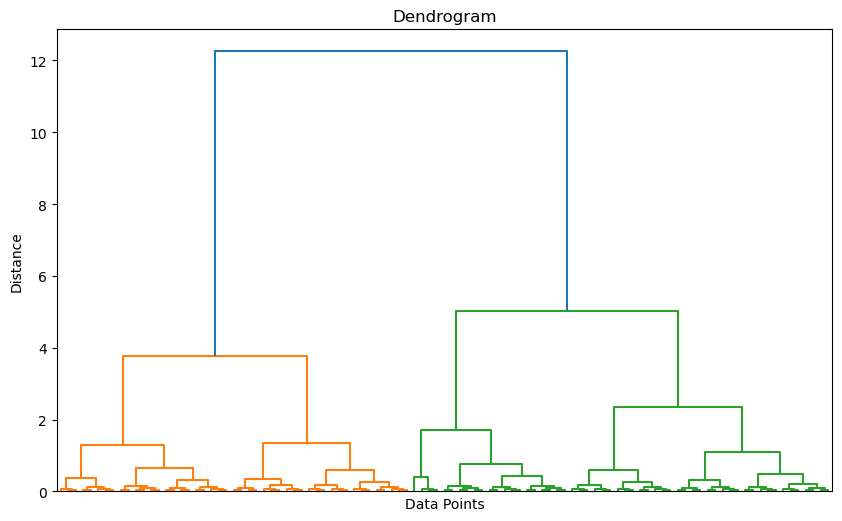

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.xticks([])
plt.show()


/home/sheshan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


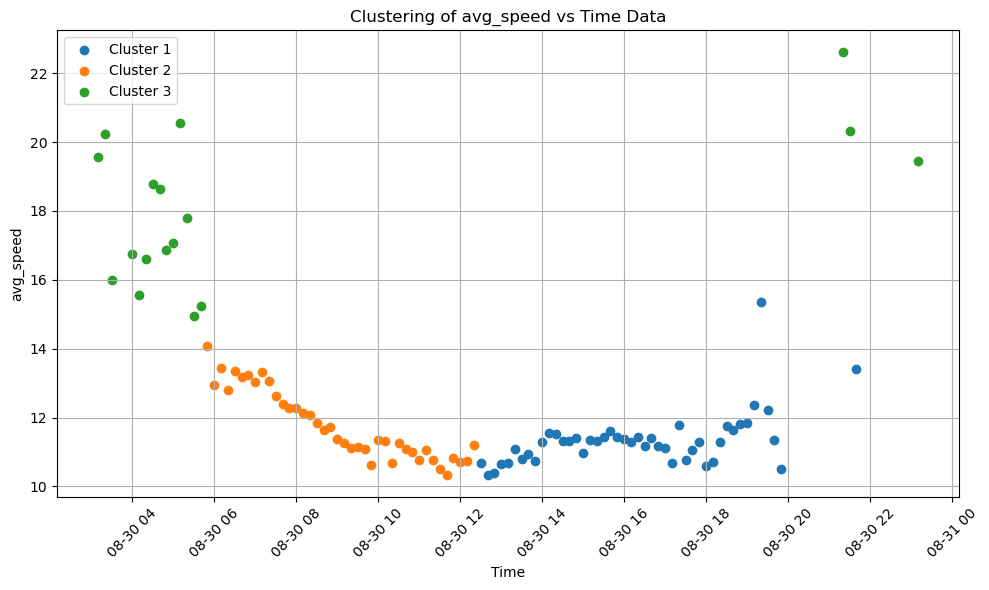

In [15]:
# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results2['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results2[results2['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


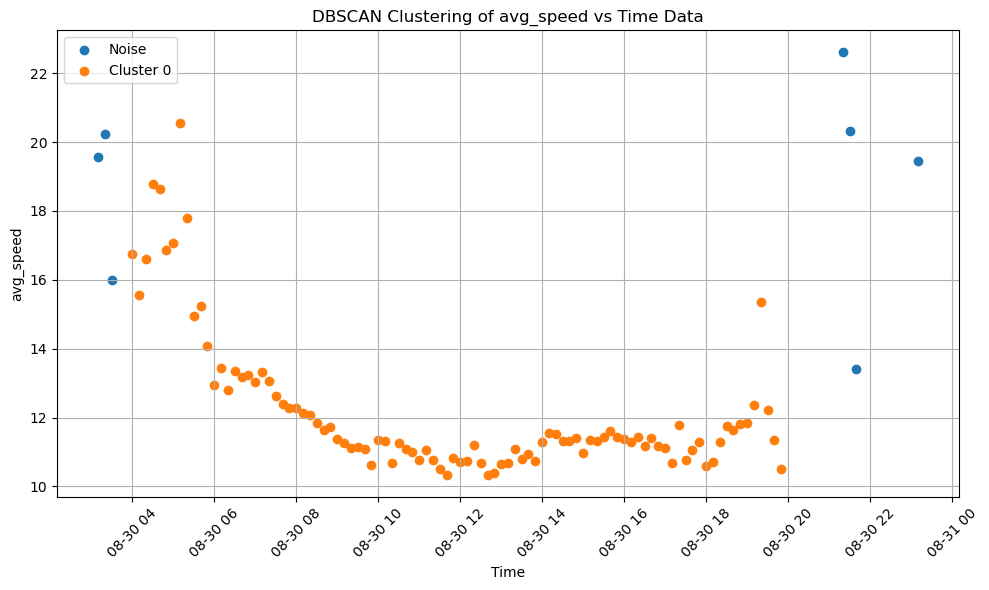

In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric', 'avg_speed']]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=4)
results2['cluster'] = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results2['cluster'].unique()
for cluster_id in unique_clusters:
    if cluster_id == -1:
        cluster_data = results2[results2['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label='Noise')
    else:
        cluster_data = results2[results2['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('DBSCAN Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


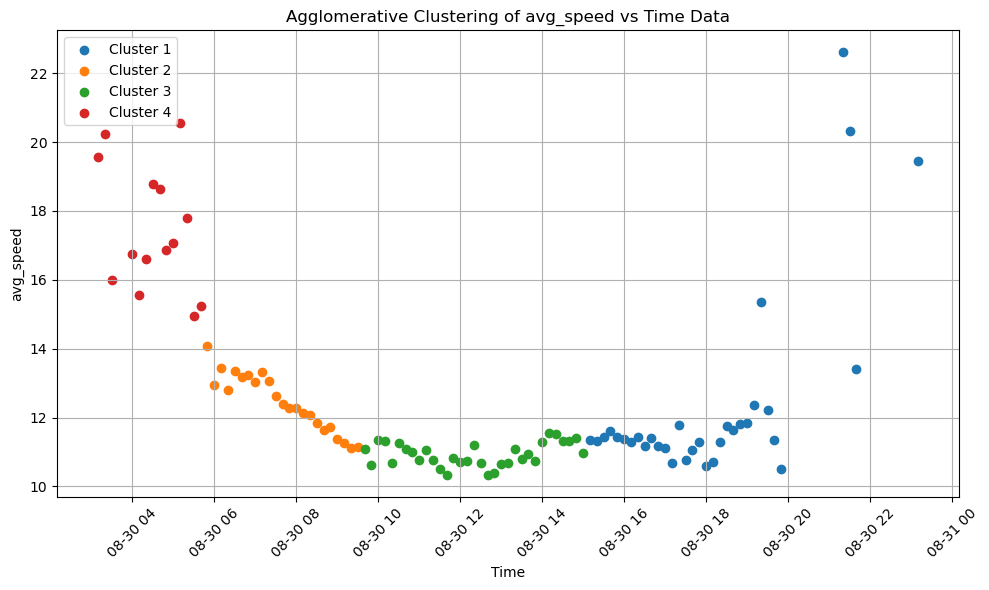

In [17]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric', 'avg_speed']]

# Perform Agglomerative clustering
num_clusters = 4  # Adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
results2['cluster'] = agg_clustering.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results2[results2['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Agglomerative Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


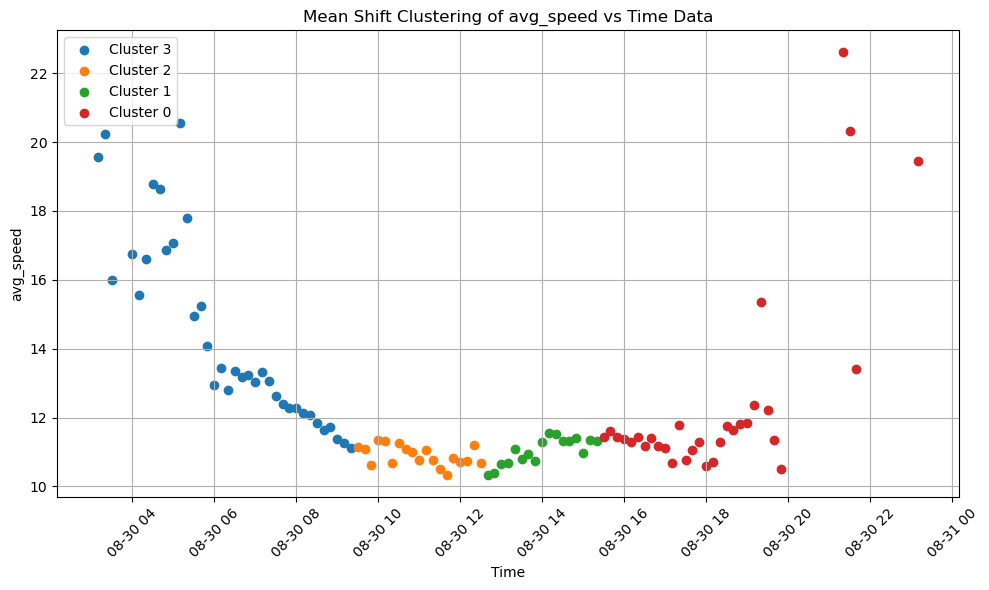

In [19]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with the data
# Drop rows with missing values in 'time' and 'avg_speed' columns
results2.dropna(subset=['time', 'avg_speed'], inplace=True)

# Convert time to numerical format (minutes since midnight)
results2['time_numeric'] = results2['time'].dt.hour * 60 + results2['time'].dt.minute

# Select relevant features for clustering
X = results2[['time_numeric', 'avg_speed']]

# Perform Mean Shift clustering
meanshift = MeanShift()
results2['cluster'] = meanshift.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results2['cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = results2[results2['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Mean Shift Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


use df2_end

In [11]:
# Convert time column to datetime
df2_end['time'] = pd.to_datetime(df2_end['time'])

# Define the time range for 10-minute intervals
start_time = pd.Timestamp('01:00:00').time()
end_time = pd.Timestamp('23:59:59').time()
time_intervals = pd.date_range(start=pd.Timestamp.combine(pd.Timestamp.today(), start_time),
                               end=pd.Timestamp.combine(pd.Timestamp.today(), end_time),
                               freq='10T')

# Create a new DataFrame to store the results
results3 = pd.DataFrame(columns=['id', 'avg_speed', 'time', 'time_component', 'weekday_end'])

# Iterate through the time intervals and calculate average speed
for interval_start, interval_end in zip(time_intervals, time_intervals[1:]):
    interval_data = df2_end[(df2_end['time'].dt.time >= interval_start.time()) & (df2_end['time'].dt.time < interval_end.time())]
    
    if not interval_data.empty:
        avg_speed = interval_data['speed'].mean()
        weekday_end = interval_data['weekday_end'].iloc[0]  # Assumes same value for the interval
        time_component = interval_data['time'].dt.time.iloc[0]  # Extract time component
        
        results3.loc[len(results3)] = [interval_data['id'].iloc[0], avg_speed, interval_start, time_component, weekday_end]

# Print the results DataFrame
print(results3)


/tmp/ipykernel_415111/1389619207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_end['time'] = pd.to_datetime(df2_end['time'])


             id  avg_speed                time time_component  weekday_end
0    1380060059  12.419000 2023-08-30 03:50:00       03:59:35            0
1    1300067058  10.934135 2023-08-30 04:00:00       04:09:01            0
2     594567917  14.358859 2023-08-30 04:10:00       04:12:13            0
3     590866478  15.050133 2023-08-30 04:20:00       04:25:12            0
4     578209046  16.817736 2023-08-30 04:30:00       04:32:43            0
..          ...        ...                 ...            ...          ...
111  1246091753  17.385369 2023-08-30 22:20:00       22:20:04            0
112  1246096945  17.361212 2023-08-30 22:30:00       22:30:12            0
113  1246099834  16.036078 2023-08-30 22:40:00       22:40:03            0
114  1246103915  13.228945 2023-08-30 22:50:00       22:50:13            0
115   764507228  14.578800 2023-08-30 23:40:00       23:45:58            0

[116 rows x 5 columns]


In [13]:
results3 = pd.DataFrame(results3)
results3

,id,avg_speed,time,time_component,weekday_end
0,1380060059,12.419000,2023-08-30 03:50:00,03:59:35,0
1,1300067058,10.934135,2023-08-30 04:00:00,04:09:01,0
2,594567917,14.358859,2023-08-30 04:10:00,04:12:13,0
3,590866478,15.050133,2023-08-30 04:20:00,04:25:12,0
4,578209046,16.817736,2023-08-30 04:30:00,04:32:43,0
...,...,...,...,...,...
111,1246091753,17.385369,2023-08-30 22:20:00,22:20:04,0
112,1246096945,17.361212,2023-08-30 22:30:00,22:30:12,0
113,1246099834,16.036078,2023-08-30 22:40:00,22:40:03,0
114,1246103915,13.228945,2023-08-30 22:50:00,22:50:13,0


/home/sheshan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


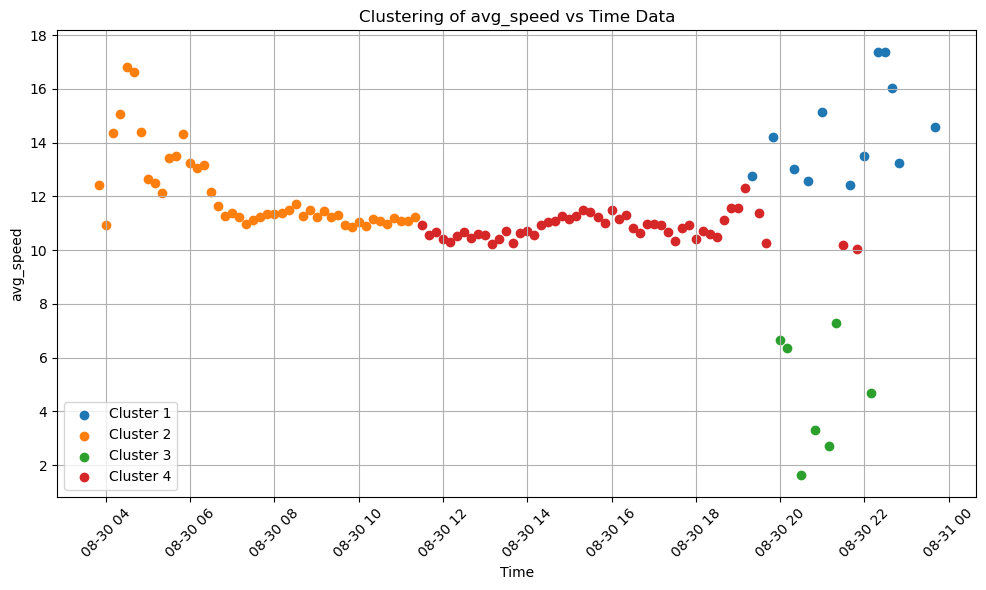

In [14]:
# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results3['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results3[results3['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


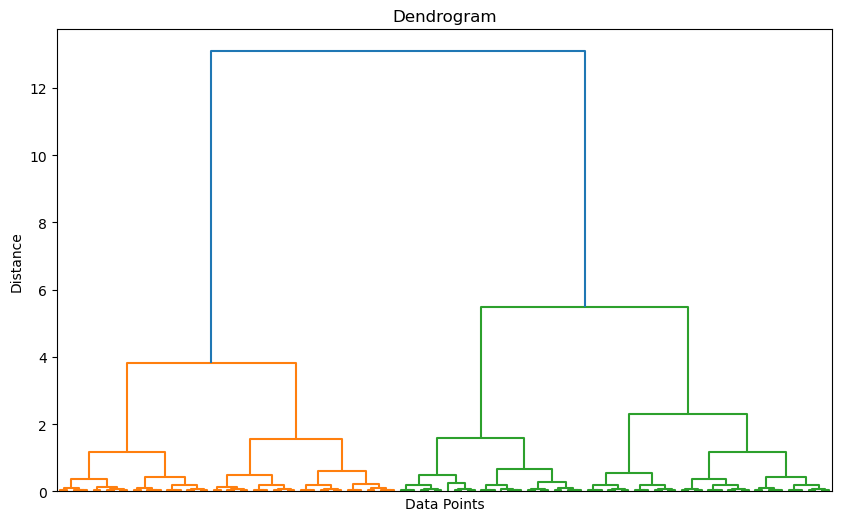

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate linkage matrix using Ward linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.xticks([])
plt.show()


/home/sheshan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


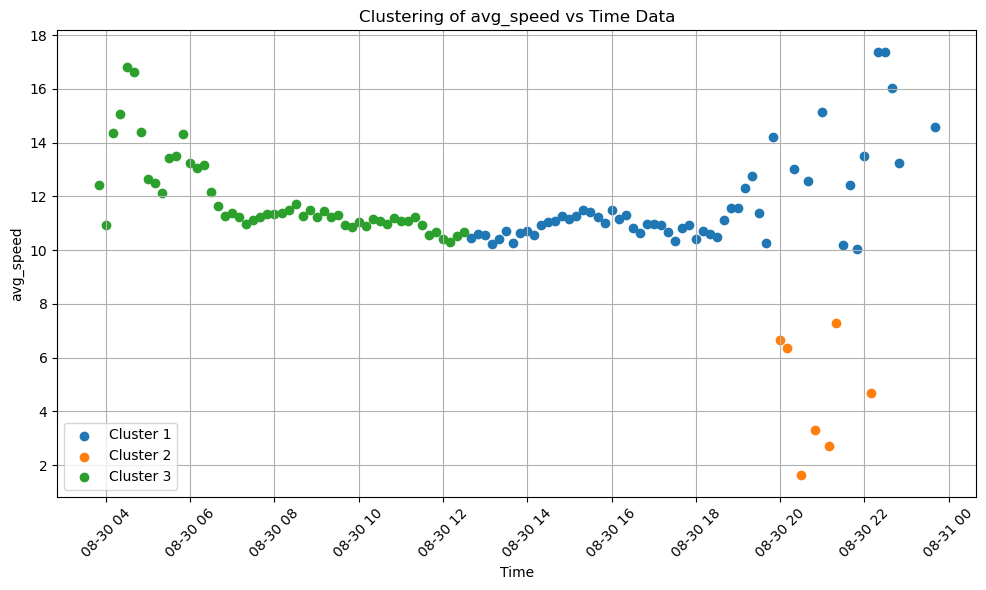

In [16]:
# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric', 'avg_speed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
results3['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results3[results3['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


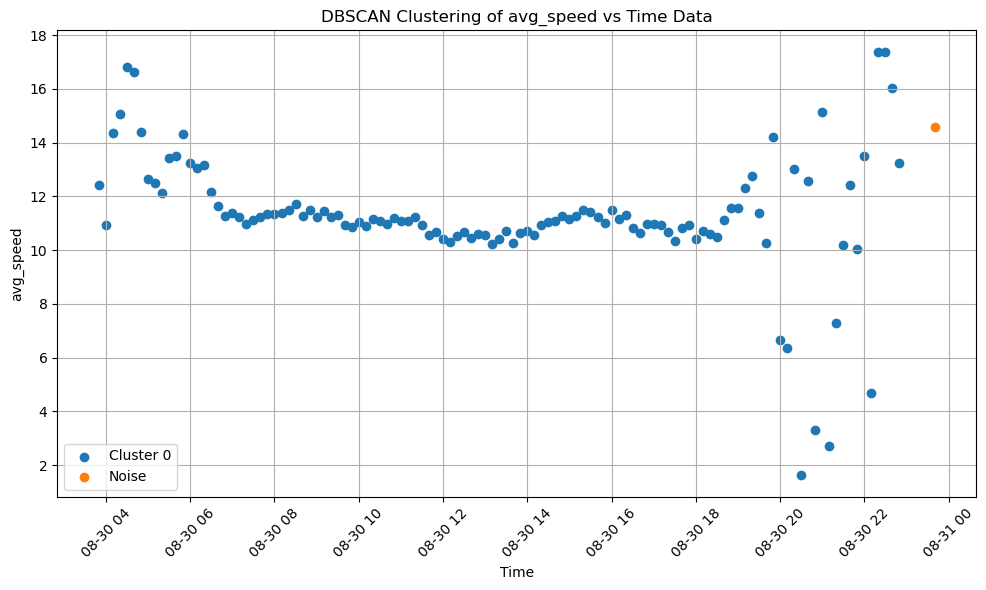

In [18]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric', 'avg_speed']]

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=30, min_samples=4)
results3['cluster'] = dbscan.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results3['cluster'].unique()
for cluster_id in unique_clusters:
    if cluster_id == -1:
        cluster_data = results3[results3['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label='Noise')
    else:
        cluster_data = results3[results3['cluster'] == cluster_id]
        plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('DBSCAN Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


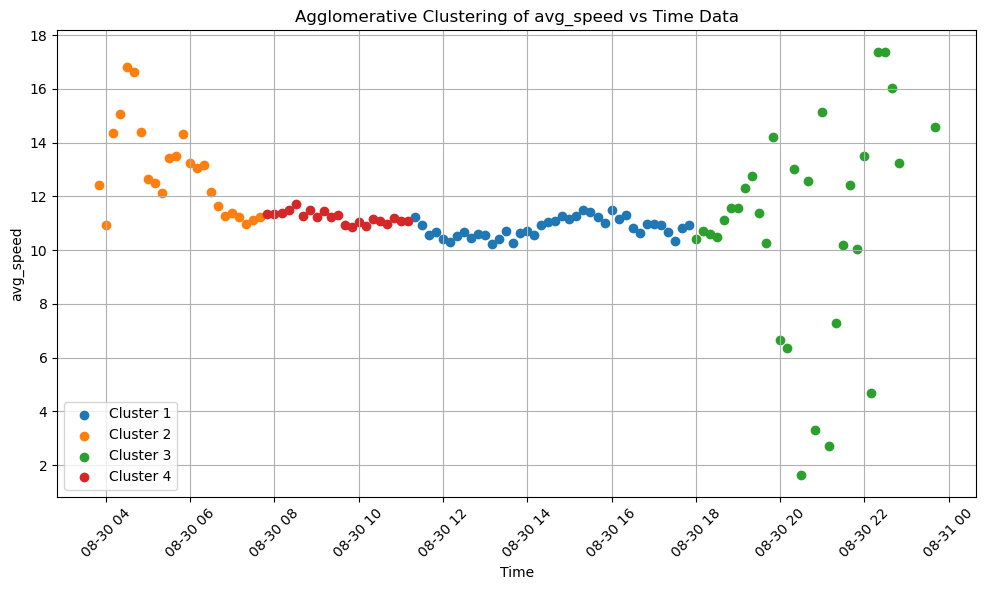

In [19]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric', 'avg_speed']]

# Perform Agglomerative clustering
num_clusters = 4  # Adjust the number of clusters as needed
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
results3['cluster'] = agg_clustering.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(num_clusters):
    cluster_data = results3[results3['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id + 1}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Agglomerative Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


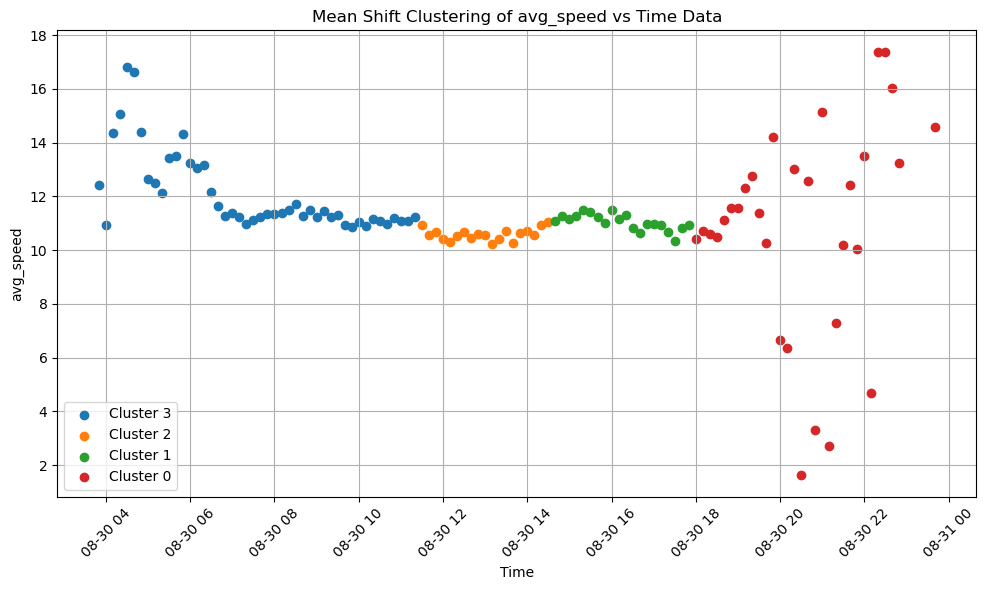

In [24]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame with the data
# Drop rows with missing values in 'time' and 'avg_speed' columns
results3.dropna(subset=['time', 'avg_speed'], inplace=True)

# Convert time to numerical format (minutes since midnight)
results3['time_numeric'] = results3['time'].dt.hour * 60 + results3['time'].dt.minute

# Select relevant features for clustering
X = results3[['time_numeric', 'avg_speed']]

# Perform Mean Shift clustering
meanshift = MeanShift()
results3['cluster'] = meanshift.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_clusters = results3['cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = results3[results3['cluster'] == cluster_id]
    plt.scatter(cluster_data['time'], cluster_data['avg_speed'], label=f'Cluster {cluster_id}')
plt.xlabel('Time')
plt.ylabel('avg_speed')
plt.title('Mean Shift Clustering of avg_speed vs Time Data')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()
